We have  74  neighborhoods


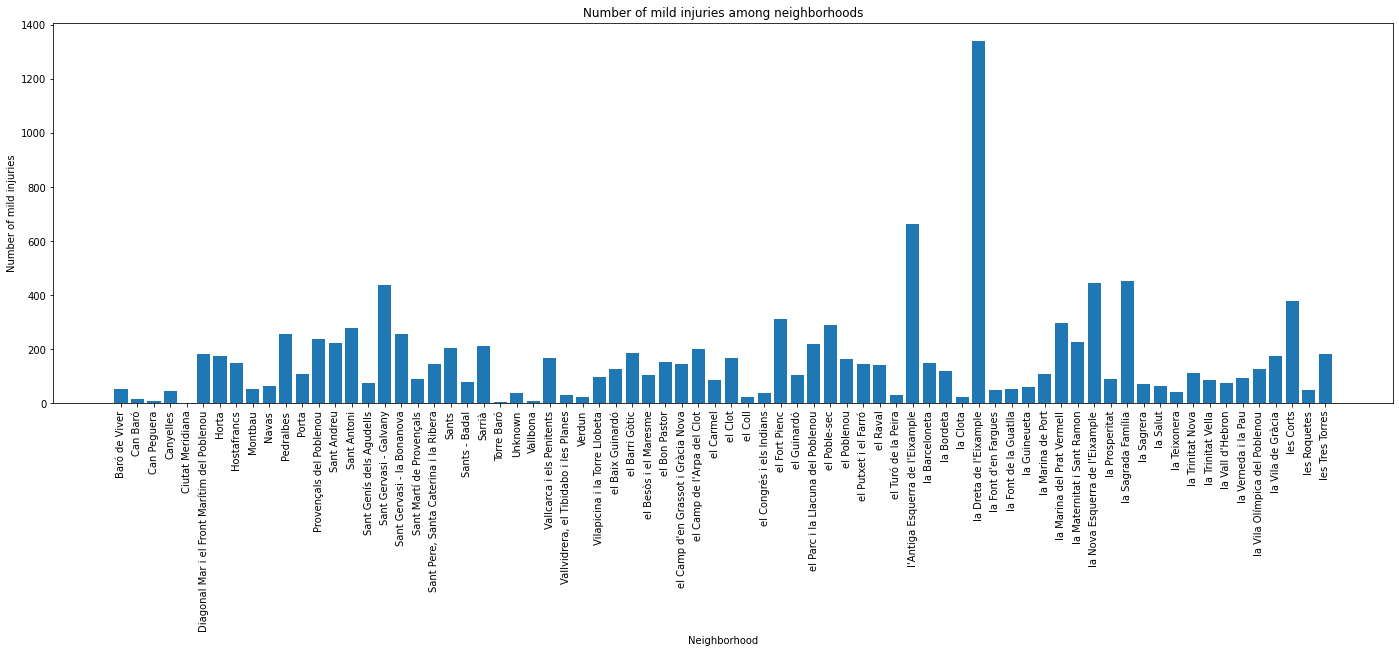

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_a= pd.read_csv('accidents_2017.csv')

df_mild = df_a[['Neighborhood Name', 'Mild injuries']]
df_mild = df_mild.groupby('Neighborhood Name').sum().reset_index()
df_mild.head(5)

names = list(df_mild['Neighborhood Name'])
print("We have ", len(names), " neighborhoods")
injuries = list(df_mild['Mild injuries'])

plt.rcParams["figure.figsize"] = (24,7)
plt.title('Number of mild injuries among neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of mild injuries')
plt.xticks(rotation='vertical')
plt.bar(names, injuries)
plt.show()


<BarContainer object of 15 artists>

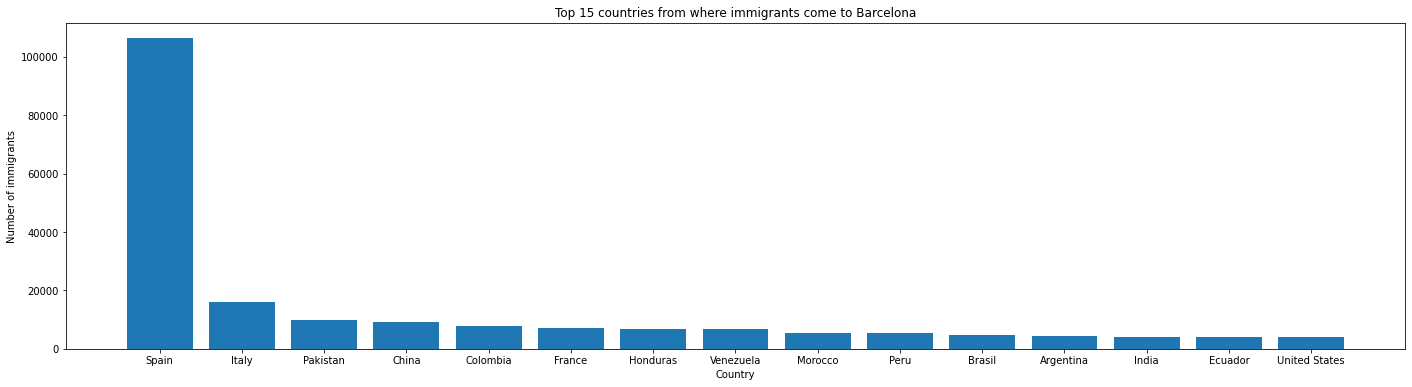

In [93]:
df_in= pd.read_csv('immigrants_by_nationality.csv')

df_mild = df_in[['Nationality', 'Number']]
df_mild = df_mild.groupby('Nationality').sum().reset_index()
df_mild = df_mild.sort_values(by=['Number'], ascending=False)
df_mild = df_mild.head(15)
df_mild

names = list(df_mild['Nationality'])
injuries = list(df_mild['Number'])

plt.rcParams["figure.figsize"] = (24,6)
plt.title('Top 15 countries from where immigrants come to Barcelona')
plt.xlabel('Country')
plt.ylabel('Number of immigrants')
plt.bar(names, injuries)

In [4]:
df_p= pd.read_csv('population.csv')
df_p.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


{('Abroad',
  'Barcelona'): Text(1.9555727839785155, 0.2947551989166828, '53085'),
 ('Barcelona',
  'Andalusia'): Text(1.7818115355132509, 0.8580752988244271, '2416'),
 ('Barcelona', 'Aragon'): Text(1.5790625813610053, 1.0765867012763402, '811'),
 ('Barcelona', 'Asturias'): Text(1.3209137623360372, 1.225628949896474, '323'),
 ('Barcelona',
  'Balearic Islands'): Text(1.0303029052343378, 1.29195896550874, '1634'),
 ('Barcelona',
  'Basque Country'): Text(0.7330518373896311, 1.269683100446574, '710'),
 ('Barcelona',
  'Canary Islands'): Text(0.45557272543823946, 1.1607805865429834, '863'),
 ('Barcelona',
  'Cantabria'): Text(0.22252088911297707, 0.9749278802425181, '162'),
 ('Barcelona',
  'Castile and León'): Text(0.05460393566843724, 0.7286390146126074, '814'),
 ('Barcelona',
  'Castilla-La Mancha'): Text(-0.03325801943508078, 0.4437975220426225, '445'),
 ('Barcelona',
  'Catalonia'): Text(-0.03325801943508078, 0.1457129353953877, '28779'),
 ('Barcelona', 'Ceuta'): Text(0.0546039356684

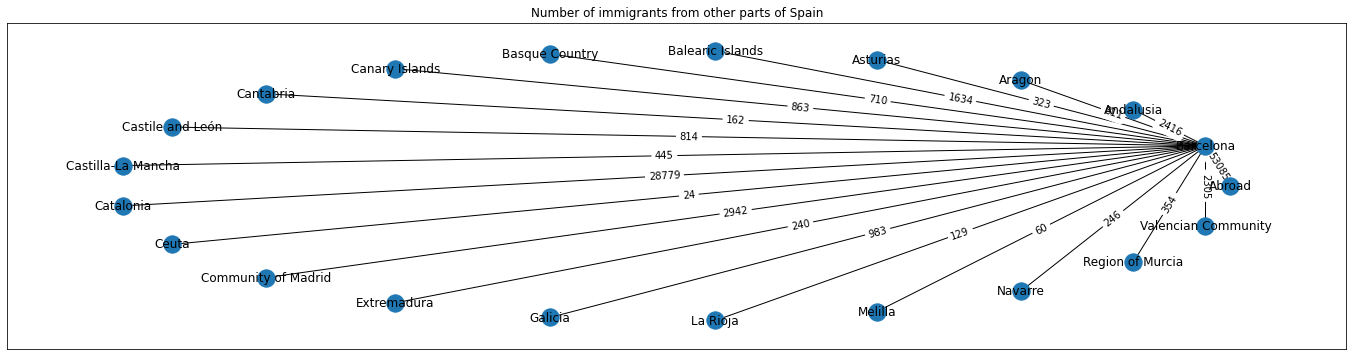

In [94]:
import networkx as nx

df_id= pd.read_csv('immigrants_emigrants_by_destination.csv')
df_id = df_id[df_id['to']=='Barcelona']
df_id

G=nx.from_pandas_edgelist(df_id, 'from', 'to', 'weight')

pos=nx.circular_layout(G, scale=2)# pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G, pos, arrows=False)
plt.rcParams["figure.figsize"] = (22,22)
plt.title('Number of immigrants from other parts of Spain')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [101]:
df_id= pd.read_csv('most_frequent_names.csv')
df_id = df_id.groupby('Name').sum().reset_index()
df_id = df_id.sort_values(by=['Frequency'], ascending=False)
df_id = df_id.head(15)
df_id

,Name,Order,Frequency
186,MARIA,60,38346
32,ANTONIO,67,33091
211,MONTSERRAT,55,32480
129,JOSE,67,30935
127,JORDI,133,27446
194,MARTA,128,25280
60,DAVID,45,24735
180,MANUEL,116,24617
49,CARMEN,67,24023
92,FRANCISCO,69,23904


In [104]:
df_bus= pd.read_csv('bus_stops.csv')
df_bus

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià
...,...,...,...,...,...,...,...
3157,K014,Day bus stop,2.183887,41.422024,BUS -191--,Sant Andreu,el Congrés i els Indians
3158,K014,Day bus stop,2.176710,41.446419,BUS -127-81--,Nou Barris,les Roquetes
3159,K015,Night bus stop,2.144596,41.411446,NITBUS -N4--,Gràcia,Vallcarca i els Penitents
3160,K014,Day bus stop,2.142256,41.371176,BUS -91-115-V5--,Sants-Montjuïc,la Bordeta


In [106]:
df_bus=df_bus[df_bus['Transport'] == 'Day bus stop']
df_bus

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià
...,...,...,...,...,...,...,...
3155,K014,Day bus stop,2.145507,41.363219,BUS -125--,Sants-Montjuïc,la Marina de Port
3156,K014,Day bus stop,2.118484,41.398514,BUS -68-75-H4--,Sarrià-Sant Gervasi,Sarrià
3157,K014,Day bus stop,2.183887,41.422024,BUS -191--,Sant Andreu,el Congrés i els Indians
3158,K014,Day bus stop,2.176710,41.446419,BUS -127-81--,Nou Barris,les Roquetes
